In [2]:
pip install numpy==1.26.4

In [4]:
import numpy as np
import pandas as pd 
train_df = pd.read_csv(r'C:\Users\Saswat dash\train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.size

10692

In [7]:
train_df.ndim

2

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.isnull().sum()
# age column has 177 missingvalues.
# cabin column has 687 missing values.
# embarked has 2 missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_df.isnull().sum().sum()

866

In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived
0    549
1    342
Name: count, dtype: int64

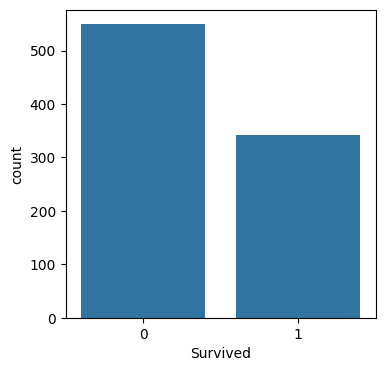

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',data=train_df)
train_df.Survived.value_counts()

<Axes: xlabel='Fare', ylabel='Count'>

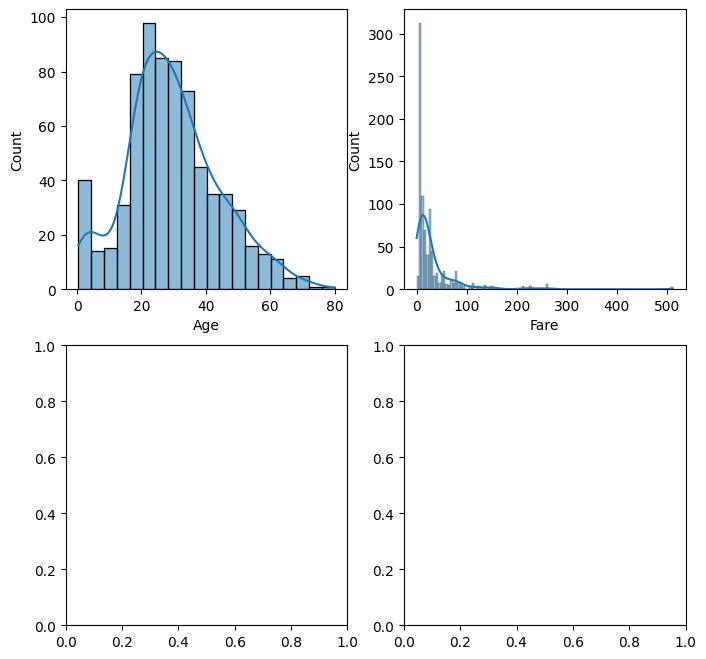

In [14]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.histplot(x='Age',data=train_df, kde=True, ax =axes[0,0])
sns.histplot(x='Fare',data=train_df, kde=True, ax=axes[0,1])

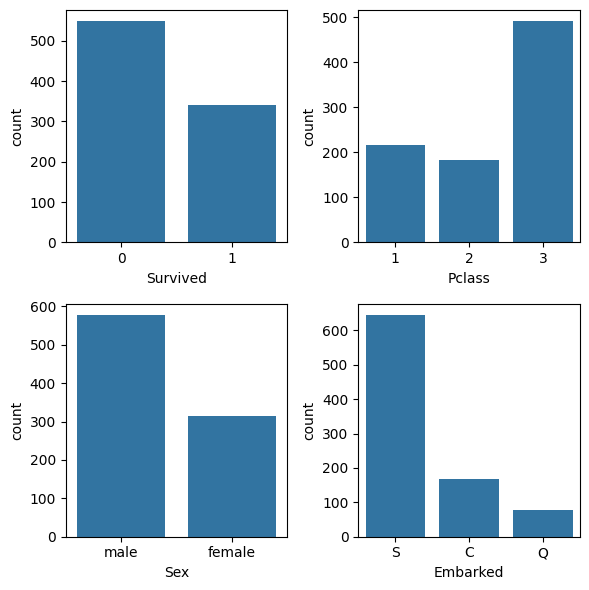

In [15]:
plt.figure(figsize=(6,6))
plotnumber=1
cat_col = ['Survived','Pclass','Sex','Embarked']
for column in cat_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(x=train_df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Pclass', ylabel='Survived'>

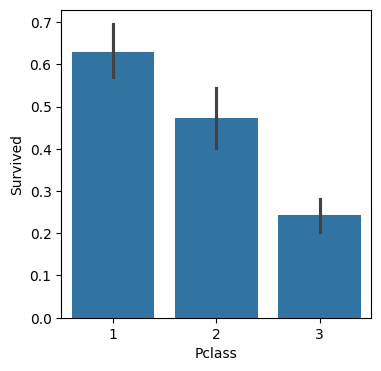

In [16]:
plt.figure(figsize=(4,4))
sns.barplot(x='Pclass', y='Survived', data=train_df)

<Axes: xlabel='Sex', ylabel='Survived'>

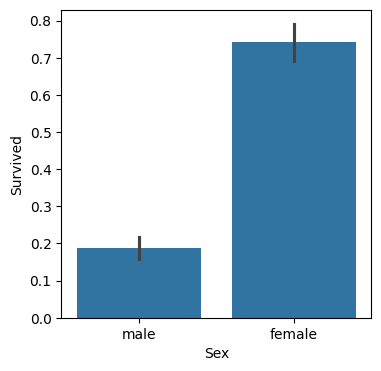

In [17]:
plt.figure(figsize=(4,4))
sns.barplot(x='Sex', y='Survived', data=train_df)

<Axes: xlabel='Embarked', ylabel='Survived'>

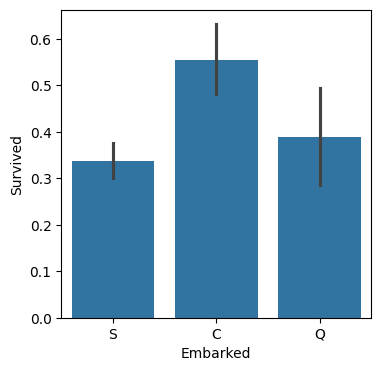

In [21]:
plt.figure(figsize=(4,4))
sns.barplot(x='Embarked', y='Survived', data=train_df)

In [19]:
corr = train_df.drop(train_df[['Name','Sex','Ticket','Cabin','Embarked']], axis=1).corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

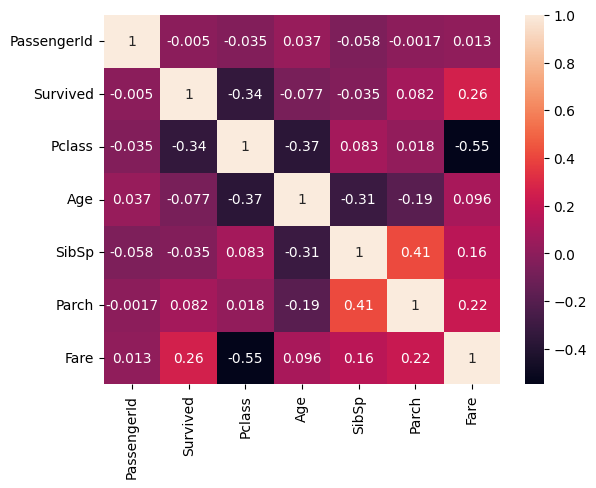

In [20]:
sns.heatmap(corr, annot=True)